In [8]:
import numpy as np
from matplotlib import pyplot as plt
import math

R = 4


## Funkcje

In [9]:
def f1(x,y):
    return round(math.pow(x,2)+y,R)

def f2(x,y):
    return 2*x+y+3

def f3(x,y):
    return x + y

## Metoda Eulera

In [10]:
def Euler(x0, x1, y0, N,f):
    h = (x1-x0)/N
    for i in range(N):
        y0 += h*f(x0,y0)
        x0 += h
    return round(y0,R)


print(Euler(0,0.3,0.1,3,f1))
#print(Euler(0,3,0,3,f2))

0.1382


## Metoda Rungego-Kutty

### drugiego rzędu RK2

In [11]:
def RK2(x0, x1, y0, N ,f):        
    h = round((x1-x0)/N,R)
    for i in range(N):
        k1 = f(x0,y0)
        k2 = f(x0+h,y0+h*k1)
        y0 += h/2*(k1+k2)
        x0 += h
    return round(y0,R)

print(RK2(0,1,0.1,10,f1))

0.1451


### czwartego rzędu RK4

In [12]:
def RK4(x0, x1, y0, N ,f):        
    h = round((x1-x0)/N,R)
    for i in range(N):
        k1 = f(x0,y0)
        k2 = f(x0+h/2,y0+h*k1/2)
        k3 = f(x0+h/2,y0+h*k2/2)
        k4 = f(x0+h,y0+h*k3)
        y0 += h/6*(k1+2*k2+2*k3+k4)
        x0 += h
    return round(y0,R)

print(RK4(0,1,0.1,10,f1))

0.1447


## Równanie różniczkowe

In [13]:
def RR(x0, x1, y0, N, f):
    print("Warunke poczatkowy: y(0) =",y0)
    print("Punkt poczatkowy: x0 =",x0)
    print("Punkt Końcowy: x =",x1)
    print("Euler: ", Euler(x0, x1, y0, N, f))
    print("RK2: ", RK2(x0, x1, y0, N, f))
    print("RK4: ", RK4(x0, x1, y0, N, f))

RR(0,1, 0.1, 10, f1)
print()
RR(0,1, 0.1, 10, f3)


Warunke poczatkowy: y(0) = 0.1
Punkt poczatkowy: x0 = 0
Punkt Końcowy: x = 1
Euler:  0.6062
RK2:  0.7077
RK4:  0.7084

Warunke poczatkowy: y(0) = 0.1
Punkt poczatkowy: x0 = 0
Punkt Końcowy: x = 1
Euler:  0.8531
RK2:  0.9855
RK4:  0.9901


## Wykresy

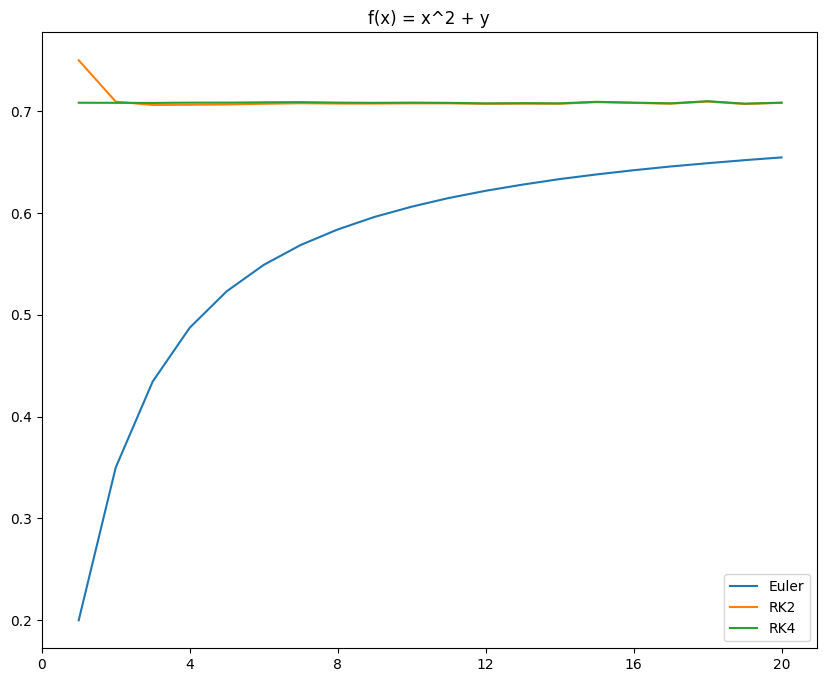

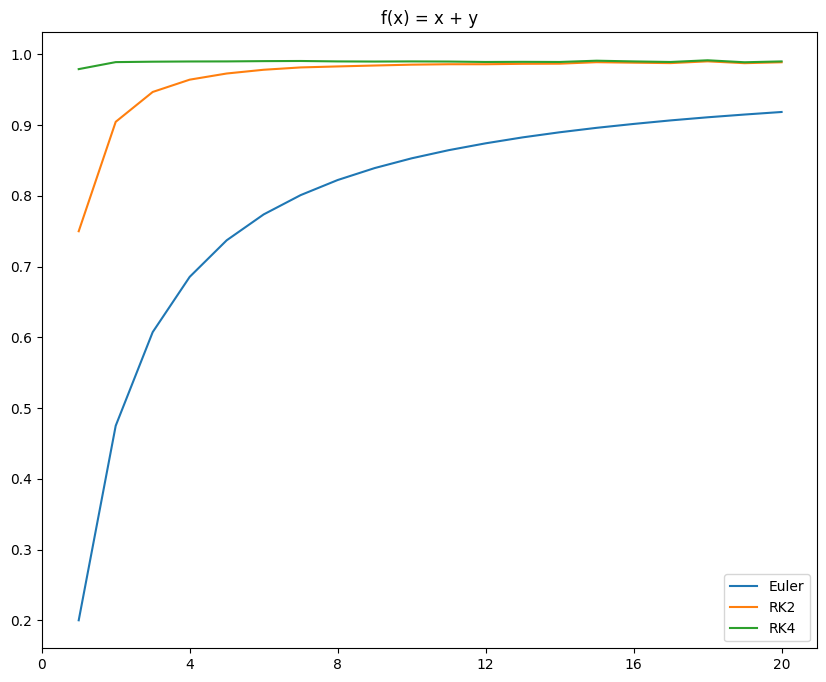

In [14]:
def chart(x0, x1, y0, size, f, title):
    fig, ax = plt.subplots(figsize=(10,8))
    tab = np.zeros(shape=(size+1, 4))
    for i in range(1,size+1):
        tab[i] = [i, Euler(x0, x1, y0, i, f), RK2(x0, x1, y0, i, f), RK4(x0, x1, y0, i, f)]
        
    plt.title(title)
    ax.plot(tab[1:, 0], tab[1:, 1])
    ax.plot(tab[1:, 0], tab[1:, 2])
    ax.plot(tab[1:, 0], tab[1:, 3])
    ax.legend(['Euler', 'RK2', 'RK4'])
    ax.set_xticks(np.arange(0, size+1, size//5))

chart(0,1, 0.1, 20, f1, "f(x) = x^2 + y")
chart(0,1, 0.1, 20, f3, "f(x) = x + y")